In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv files
df=pd.read_csv('hr.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Data Exploration (exploratory data analysis or EDA)


In [3]:
#Display The head ==> To Check if Data is Properly Imported
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#To check the shape of the dataset
df.shape # (rows, columns)

(1470, 35)

In [5]:
#features in data
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [7]:
# Are there any missing values?
df.isna().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
#Lets describe the dataset
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


mean is greater than median means outliers are present and data is right skewed.

In [9]:
#number of unique value in each features
for col in df.columns.values:
    print("number of unique valuse of {} : {}".format(col, df[col].nunique()))

number of unique valuse of Age : 43
number of unique valuse of Attrition : 2
number of unique valuse of BusinessTravel : 3
number of unique valuse of DailyRate : 886
number of unique valuse of Department : 3
number of unique valuse of DistanceFromHome : 29
number of unique valuse of Education : 5
number of unique valuse of EducationField : 6
number of unique valuse of EmployeeCount : 1
number of unique valuse of EmployeeNumber : 1470
number of unique valuse of EnvironmentSatisfaction : 4
number of unique valuse of Gender : 2
number of unique valuse of HourlyRate : 71
number of unique valuse of JobInvolvement : 4
number of unique valuse of JobLevel : 5
number of unique valuse of JobRole : 9
number of unique valuse of JobSatisfaction : 4
number of unique valuse of MaritalStatus : 3
number of unique valuse of MonthlyIncome : 1349
number of unique valuse of MonthlyRate : 1427
number of unique valuse of NumCompaniesWorked : 10
number of unique valuse of Over18 : 1
number of unique valuse of

In [10]:
#These columnn('StandardHours','Over18','EmployeeCount) has only one value throughout the dataset so it will not help us in anywhere so we can drop
df.drop(['StandardHours','Over18','EmployeeCount'],axis=1,inplace=True)

# Univariate  Analysis

In [11]:
# Let's find out how many of each class there
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [12]:
#num percentage in dataset
print('Percentage',df.Attrition.value_counts(normalize=True))

Percentage No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


Text(0.5, 6.79999999999999, 'Attrition')

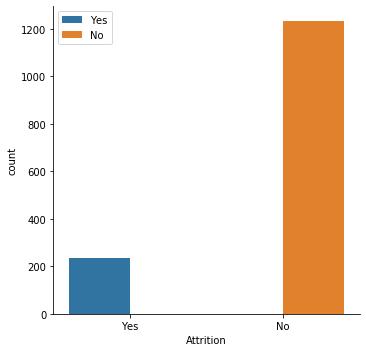

In [13]:
#Lets check the count of each class in target varaible and also Count Number of employees who left and who are loyal....
%matplotlib inline
sns.catplot(x='Attrition',data=df,kind='count',hue='Attrition')
plt.legend()
plt.xlabel("Attrition")

Here  we see classes are imbalanced and there are large no of loyal employees in the company.


Text(0.5, 6.79999999999999, 'Department')

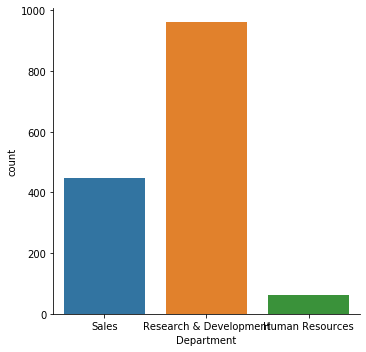

In [14]:
#Lets check the count of employees in each Department
sns.catplot(x='Department',data=df,kind='count')
plt.xlabel("Department")


In department1 no of employees are more as compared to other department

Text(0.5, 5.89374999999999, 'BusinessTravel')

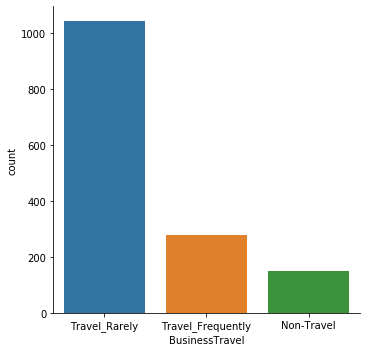

In [15]:
#Lets check the count of employees based on buisness travel
%matplotlib inline
sns.catplot(x='BusinessTravel',data=df,kind='count')
plt.xlabel("BusinessTravel")

#most of the employees travel rarely

Age                            AxesSubplot(0.125,0.772143;0.168478x0.107857)
DailyRate                   AxesSubplot(0.327174,0.772143;0.168478x0.107857)
DistanceFromHome            AxesSubplot(0.529348,0.772143;0.168478x0.107857)
Education                   AxesSubplot(0.731522,0.772143;0.168478x0.107857)
EmployeeNumber                 AxesSubplot(0.125,0.642714;0.168478x0.107857)
EnvironmentSatisfaction     AxesSubplot(0.327174,0.642714;0.168478x0.107857)
HourlyRate                  AxesSubplot(0.529348,0.642714;0.168478x0.107857)
JobInvolvement              AxesSubplot(0.731522,0.642714;0.168478x0.107857)
JobLevel                       AxesSubplot(0.125,0.513286;0.168478x0.107857)
JobSatisfaction             AxesSubplot(0.327174,0.513286;0.168478x0.107857)
MonthlyIncome               AxesSubplot(0.529348,0.513286;0.168478x0.107857)
MonthlyRate                 AxesSubplot(0.731522,0.513286;0.168478x0.107857)
NumCompaniesWorked             AxesSubplot(0.125,0.383857;0.168478x0.107857)

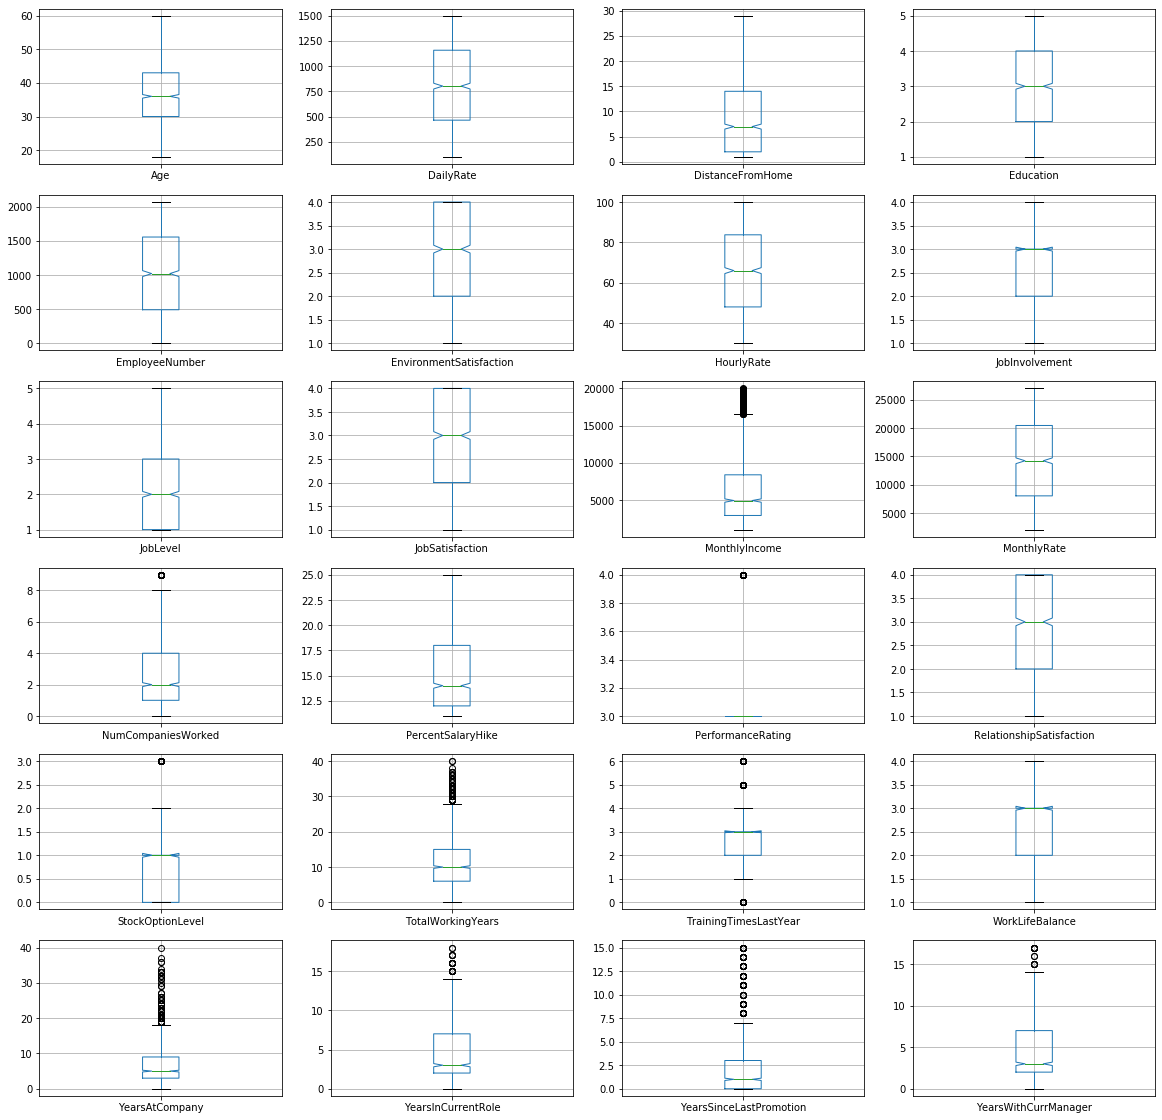

In [16]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(6,4),figsize=(20,20),grid=True,notch=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021158978D48>,
      dtype=object)

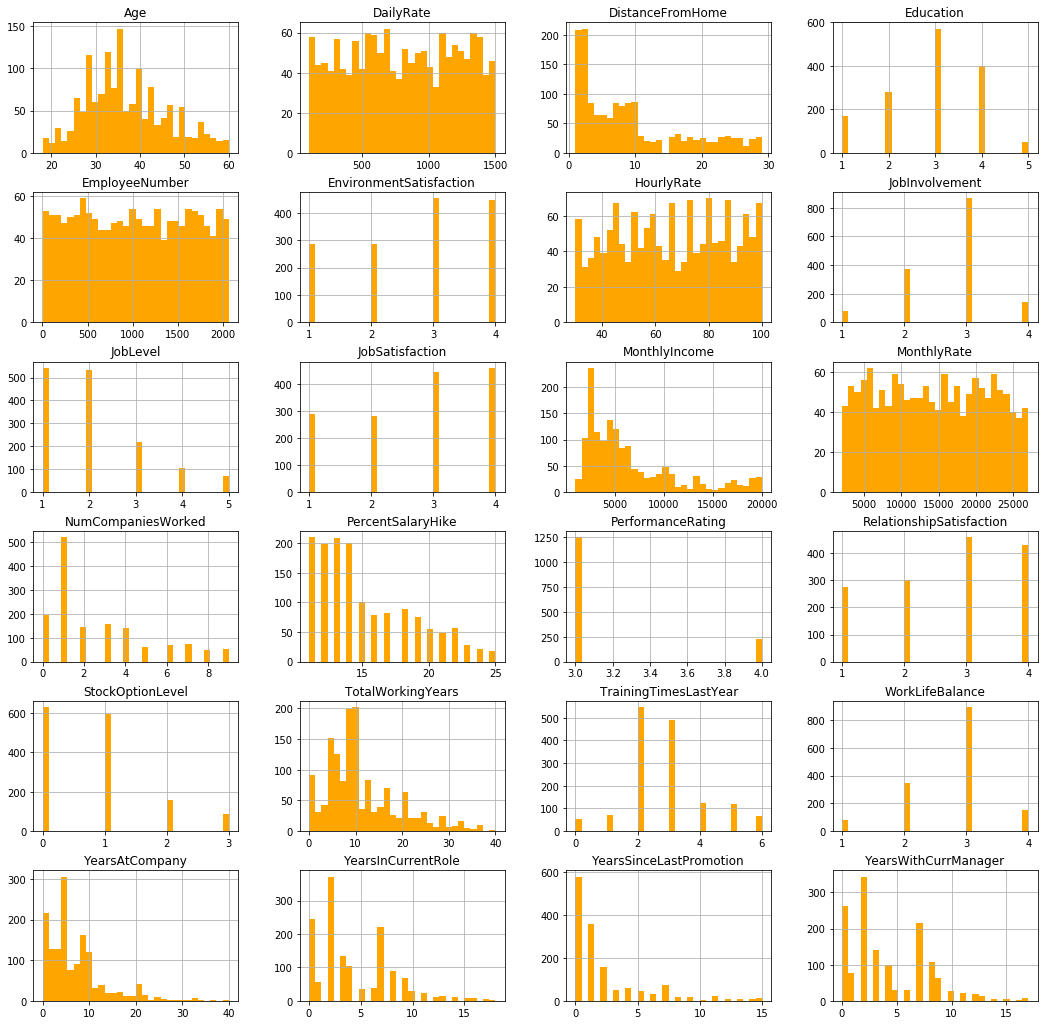

In [17]:
#plotting histograms for checking normal distribution
df.hist(figsize=(18,18),grid=True,layout=(6,4),bins=30,color='orange')

# Bivarient  Analysis

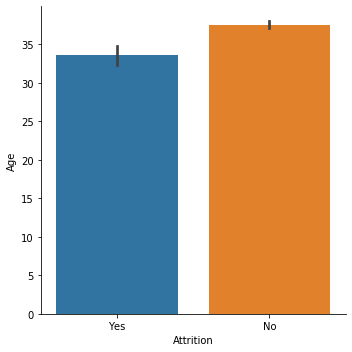

In [18]:
#Lets see average age of employees in respect of attrition
sns.catplot(x='Attrition', y="Age", data=df,kind="bar");
plt.show()

from above graph we can conclude that persons who left the job are mostly younger in age

Text(0.5, 20.80000000000002, 'BusinessTravel')

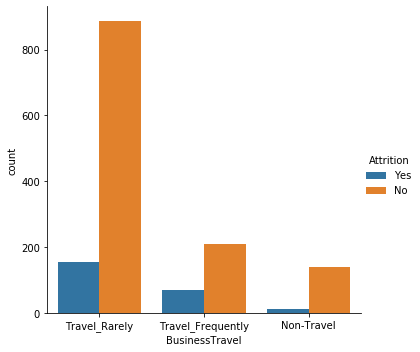

In [19]:
#Lets see the count of each category of buisness travel in respect to attrition
%matplotlib inline
sns.catplot(x='BusinessTravel',data=df,kind='count',hue='Attrition')
plt.xlabel("BusinessTravel")

Number of Persons who left falls in the Travel_Rarely Category but, Proportion of attrition is higher where travel is frequently

Text(0.5, 0, 'Department')

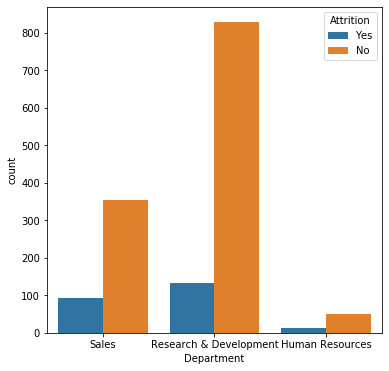

In [20]:
#lets check in which department attrintion is high
plt.figure(figsize=(6,6))
sns.countplot(x='Department',data=df,hue='Attrition')
plt.xlabel("Department")


Number of persons who left are from R&D department but the proportion is high in Sales Department.

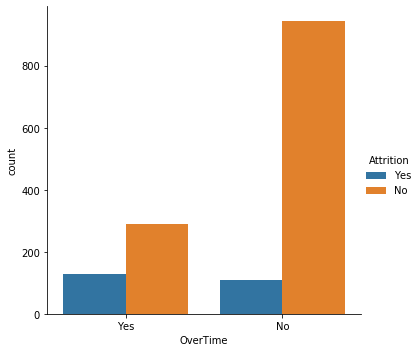

In [21]:
#lets check comparision between overtime and attrition
sns.catplot(x='OverTime',data=df,kind='count',hue='Attrition',)

People who have to work overtime show higher proportion of leavers compared to their counterparts.

Text(0.5, 0, 'DistanceFromHome')

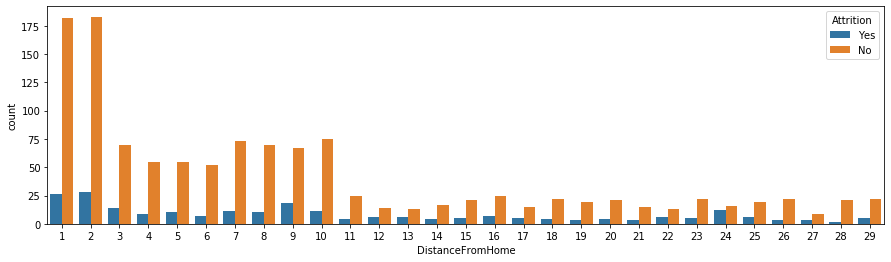

In [22]:
#lets check attrition in respect to distance from home
plt.figure(figsize=(15,4))
sns.countplot(x='DistanceFromHome',data=df,hue='Attrition')
plt.xlabel("DistanceFromHome")

Number of Persons who left lives in the (0-10) km range are more.

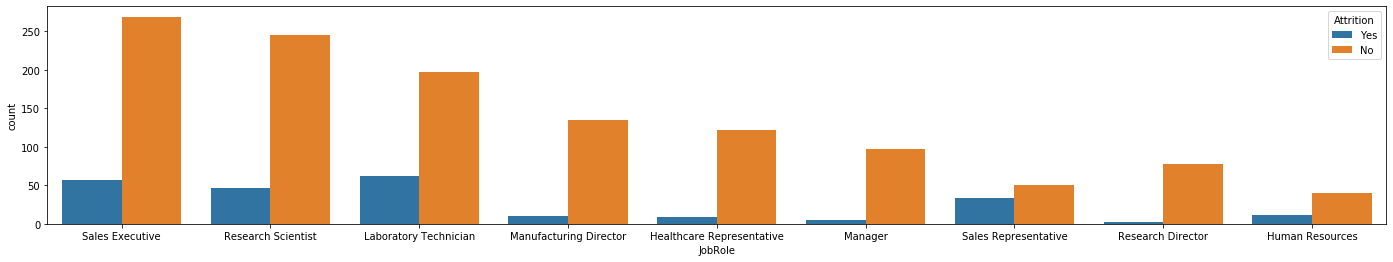

In [23]:
#Lets check  attrition in each job role
plt.figure(figsize=(24,4))
sns.countplot(x='JobRole',data=df,hue='Attrition')
plt.show()

Number of Laboratory Technicians and also their proportion of Attrition is more than the rest.

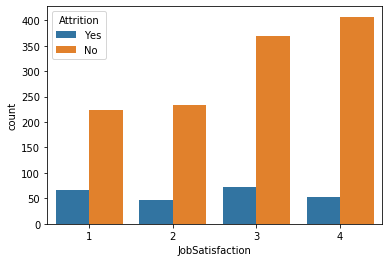

In [24]:
#lets chcek the attrition ratio based on job satisfaction
sns.countplot(x="JobSatisfaction",data=df,hue="Attrition")
plt.show()

here we are able  to see that as job satisfaction increases proportion of aleavers decreases may be since they expect that their work deserves more rating and is undervalued almost all the people who left were who got rating 3

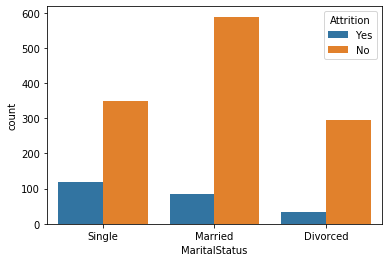

In [25]:
#Lets chcek the attrition ratio in MaritalStatus
sns.countplot(x="MaritalStatus",data=df,hue="Attrition")
plt.show()

Single employees show the largest proportion of leavers, compared to Married and Divorced counterparts.

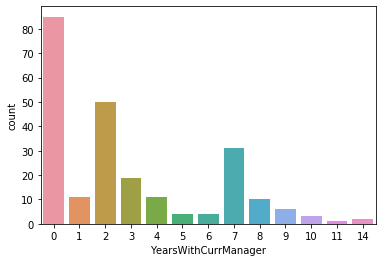

In [26]:
#lets check people who leave are happy or not with their managers
sns.countplot(x="YearsWithCurrManager",data=df.loc[df["Attrition"]=="Yes"])
plt.show()

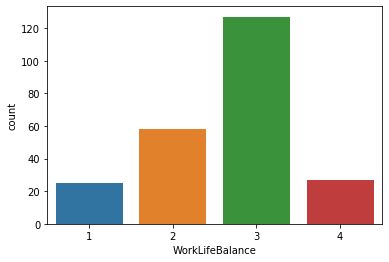

In [27]:
#lets check the work life balance of employees with respect to attrition
sns.countplot(x="WorkLifeBalance",data=df.loc[df["Attrition"]=="Yes"])
plt.show()


here worklifebalance at 3 left more

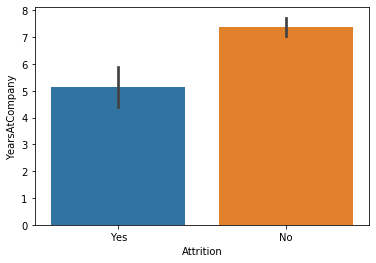

In [28]:
# average working years of the employee who left and who stay
sns.barplot(x="Attrition",y="YearsAtCompany",data=df)
plt.show()

Here we can get that the average number of years of employee is staying in the company more before leaving early.

In [29]:
df.loc[df["Attrition"]=="Yes"].groupby(["YearsSinceLastPromotion"]).agg({"Attrition":"count"})


,Attrition
YearsSinceLastPromotion,
0,110
1,49
2,27
3,9
4,5
5,2
6,6
7,16
9,4


here majority almost half of people left not even single year passed since last promotioncan conclude promotion is not the factor why people left the company

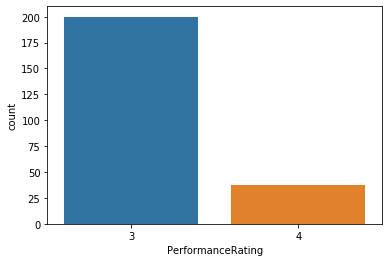

In [30]:
#Now lets check how performnce rating is afecting attrition level
sns.countplot(x="PerformanceRating",data=df.loc[df["Attrition"]=="Yes"])


May be since Ex's expect that their work deserves more rating and is undervalued, almost all the people who left were who       got rating 3.

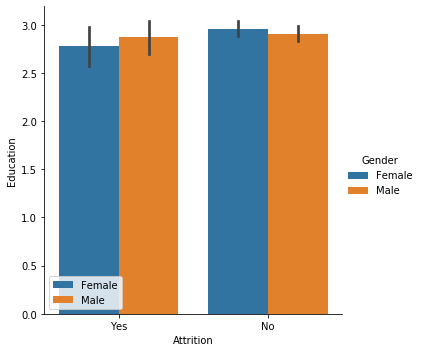

In [31]:
sns.catplot(y='Education',x='Attrition',data=df,kind='bar',hue='Gender')
plt.legend()

Ex Employees are more who are male than Females.

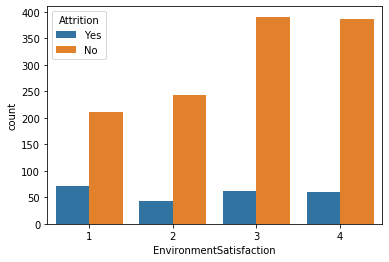

In [32]:
sns.countplot(x="EnvironmentSatisfaction",data=df,hue='Attrition')
plt.show()

People who likes the enviroment very much and who don't like the environment are almost equal.

In [33]:
#lets see correlation matrix
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


In [34]:
# Using Label Encoder so that object data can be convert to binary data so that data can be evaluated
from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
list1=['Attrition','BusinessTravel','Department','EducationField','OverTime','MaritalStatus','JobRole','Gender']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [123]:
#lets check skewness
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.019754
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome           -0.029121
Education                  -0.289681
EducationField             -0.054786
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
OverTime                    0.964489
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears           0.322355
TrainingTimesLastYear       0.492375
W

In [36]:
#lets remove the skewness
for i in df.drop(['Attrition'],axis=1).columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])
    if df.skew().loc[i]<-0.5:
        df[i]=np.square(df[i])


In [37]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)#shape of dataset before outliers remove
df_hr=df.loc[(z<3).all(axis=1)]
print(df_hr.shape)#shape of dataset after outliers removed

(1470, 32)
(1470, 32)


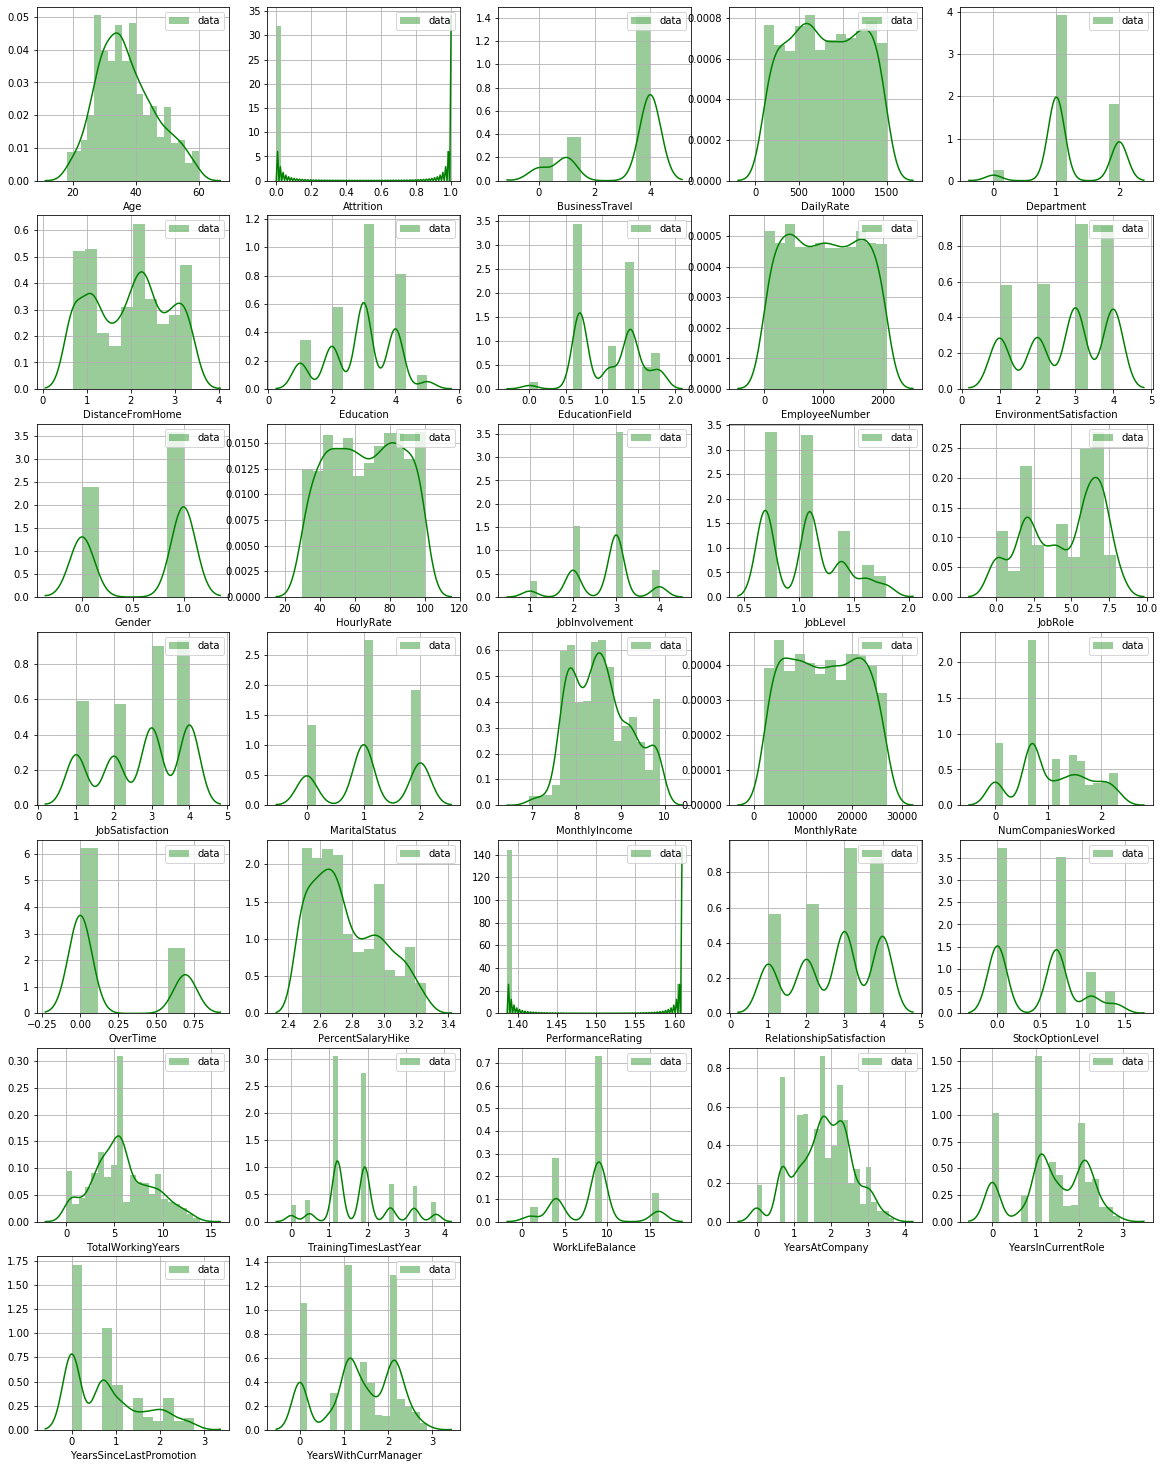

In [38]:
# Checking the Normal Distribution using distplot after removing outliers
plt.figure(figsize=(20,30))
for i,col in enumerate(list(df_hr.columns.values)):
    plt.subplot(8,5,i+1)
    sns.distplot(df[col],color='g',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout

(32.0, 0.0)

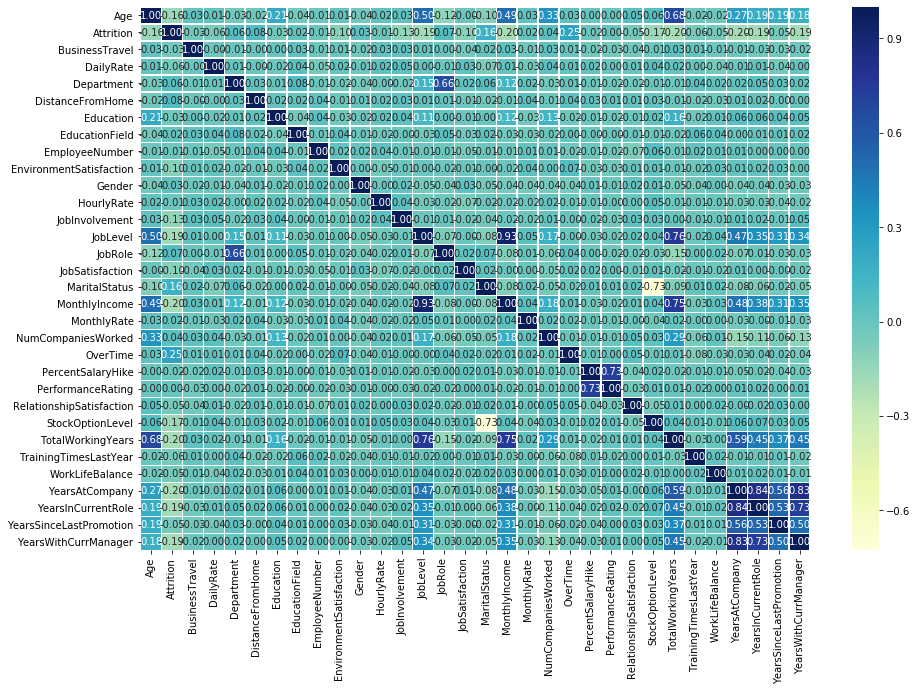

In [39]:
# Plotting Heatmap for Correlation
corr_matrix = df_hr.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Modeling

In [40]:
# Split data into X and y
X = df_hr.drop("Attrition", axis=1)

y = df_hr["Attrition"]

In [41]:
# Independent variables (no target column)
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,4,1102,2,0.693147,2,0.693147,1,2,0,...,1.386294,1,0.000000,4.827796,0.000000,1,1.945910,1.609438,0.000000,1.791759
1,49,1,279,1,2.197225,1,0.693147,2,3,1,...,1.609438,4,0.693147,5.749902,1.921812,9,2.397895,2.079442,0.693147,2.079442
2,37,4,1373,1,1.098612,2,1.609438,4,4,1,...,1.386294,2,0.000000,4.324077,1.921812,9,0.000000,0.000000,0.000000,0.000000
3,33,1,1392,1,1.386294,4,0.693147,5,4,0,...,1.386294,3,0.000000,4.827796,1.921812,9,2.197225,2.079442,1.386294,0.000000
4,27,4,591,1,1.098612,1,1.386294,7,1,1,...,1.386294,4,0.693147,3.786566,1.921812,9,1.098612,1.098612,1.098612,1.098612


In [42]:
# Target variable
y


0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [43]:
#checking shape of input variable
X.shape

(1470, 31)

In [44]:
#checking shape of target variable
y.shape

(1470,)

In [45]:
#lets bring all features to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.630883,0.742527,1.401512,-1.505350,-0.891688,-0.958897,-1.701283,-0.660531,-1.224745,...,-0.426230,-1.584178,-1.056106,-0.309162,-2.065005,-1.926970,0.177344,0.290611,-0.973342,0.547996
1,1.322365,-1.313348,-1.297775,-0.493817,0.252002,-1.868426,-0.958897,-1.699621,0.254625,0.816497,...,2.346151,1.191438,0.471284,-0.000474,0.192041,0.237214,0.774724,0.882670,-0.117271,0.904924
2,0.008343,0.630883,1.414363,-0.493817,-1.031607,-0.891688,1.239443,-1.696298,1.169781,0.816497,...,-0.426230,-0.658973,-1.056106,-0.477788,0.192041,0.237214,-2.394527,-1.736783,-0.973342,-1.675043
3,-0.429664,-1.313348,1.461466,-0.493817,-0.695482,1.061787,-0.958897,-1.694636,1.169781,-1.224745,...,-0.426230,0.266233,-1.056106,-0.309162,0.192041,0.237214,0.509502,0.882670,0.738799,-1.675043
4,-1.086676,0.630883,-0.524295,-0.493817,-1.031607,-1.868426,0.704083,-1.691313,-1.575686,0.816497,...,-0.426230,1.191438,0.471284,-0.657728,0.192041,0.237214,-0.942513,-0.352871,0.383498,-0.311993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,-1.313348,0.202082,-0.493817,1.397995,-0.891688,0.704083,1.721670,0.254625,0.816497,...,-0.426230,0.266233,0.471284,0.871367,0.192041,0.237214,-0.026394,-0.352871,-0.973342,0.044935
1466,0.227347,0.630883,-0.469754,-0.493817,-0.041631,-1.868426,0.704083,1.723332,1.169781,0.816497,...,-0.426230,-1.584178,0.471284,-0.150449,1.705407,0.237214,0.353830,0.882670,-0.117271,0.904924
1467,-1.086676,0.630883,-1.605183,-0.493817,-0.434763,0.085049,-0.958897,1.726655,-0.660531,0.816497,...,2.346151,-0.658973,0.471284,-0.657728,-2.065005,0.237214,0.177344,-0.352871,-0.973342,0.044935
1468,1.322365,-1.313348,0.546677,1.401512,-1.031607,0.085049,0.704083,1.728317,1.169781,0.816497,...,-0.426230,1.191438,-1.056106,0.871367,0.192041,-1.115401,0.648755,0.714462,-0.973342,1.051057


In [46]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def maxrandomcore(model,x,y):
    max_acc_score=0
    for acc_state in range(42,100): 
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=0.20,stratify=y)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        accuracy_score1=accuracy_score(y_test,y_pred)
        if accuracy_score1 > max_acc_score:
            max_acc_score=accuracy_score1
            final_acc_state=acc_state
    print('max acc score corresponding to',final_acc_state,'is:', max_acc_score)
    return final_acc_state

In [47]:
# Evaluate the model on the training set
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.naive_bayes import MultinomialNB
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "GaussianNB":GaussianNB(),
          "SVC":SVC(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier(),
          "XGBClassifier":XGBClassifier(),
          "AdaBoostClassifier":AdaBoostClassifier()
         }

# Create a function to fit and score models
def fit_and_score(models):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        acc_state=maxrandomcore(model,x,y)
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=.20)
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_train, y_train)
    return model_scores

In [48]:
#learning scores of a model
model_scores = fit_and_score(models=models)

model_scores


max acc score corresponding to 78 is: 0.9047619047619048
max acc score corresponding to 50 is: 0.8673469387755102
max acc score corresponding to 96 is: 0.8741496598639455
max acc score corresponding to 51 is: 0.8707482993197279
max acc score corresponding to 80 is: 0.8877551020408163
max acc score corresponding to 50 is: 0.8299319727891157
max acc score corresponding to 47 is: 0.8945578231292517
max acc score corresponding to 43 is: 0.8979591836734694
max acc score corresponding to 81 is: 0.9047619047619048


{'Logistic Regression': 0.875,
 'KNN': 0.8784013605442177,
 'Random Forest': 0.9846938775510204,
 'GaussianNB': 0.8180272108843537,
 'SVC': 0.9209183673469388,
 'DecisionTreeClassifier': 1.0,
 'GradientBoostingClassifier': 0.9591836734693877,
 'XGBClassifier': 1.0,
 'AdaBoostClassifier': 0.8962585034013606}

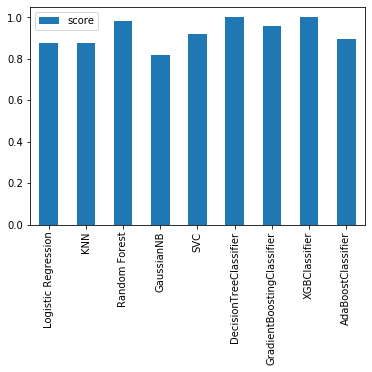

In [49]:
#Plotting bar plot of scores of various models
model_compare = pd.DataFrame(model_scores, index=["score"])
model_compare.T.plot.bar()

******************** SVC *********************


max acc score corresponding to 80 is: 0.8877551020408163
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


Accuracy Score= 0.8877551020408163


Cross_val_score= 0.8196405035482002


roc_auc_score =  0.648936170212766


Classification report
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       247
           1       1.00      0.30      0.46        47

    accuracy                           0.89       294
   macro avg       0.94      0.65      0.70       294
weighted avg       0.90      0.89      0.86       294



[[247   0]
 [ 33  14]]





******************** Random Forest *********************


max acc score corresponding to 43 is: 0.8809523809523809
RandomForestClassifier(bootstrap=True, cla

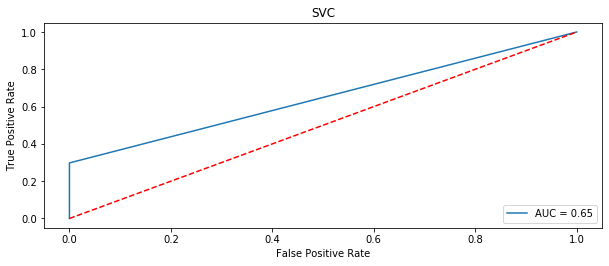

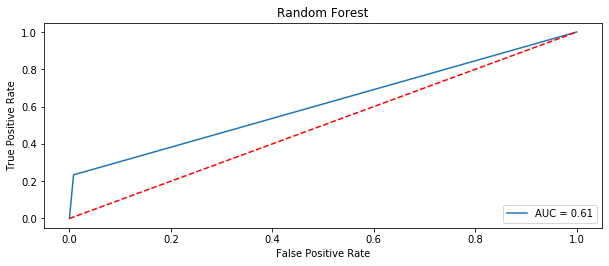

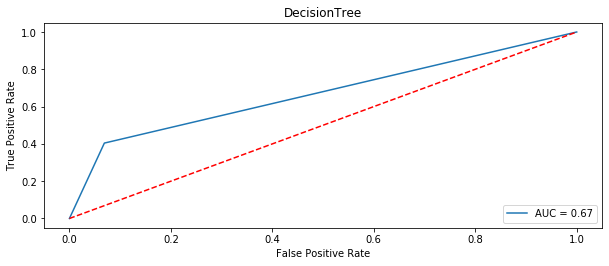

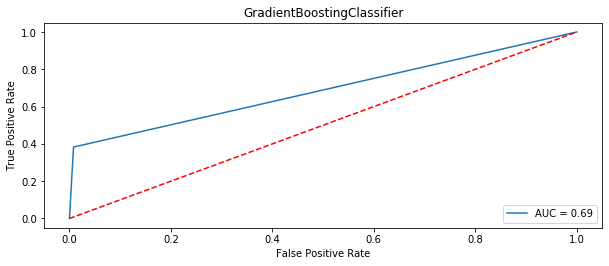

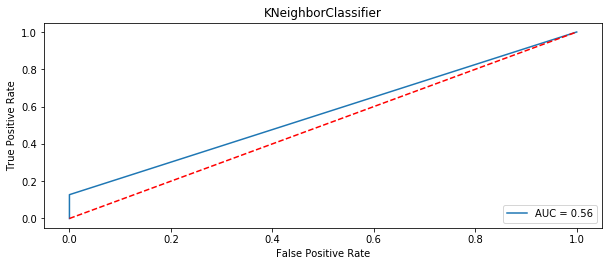

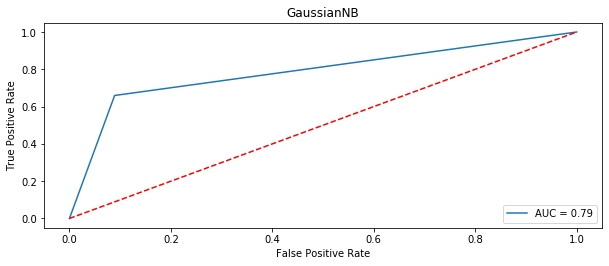

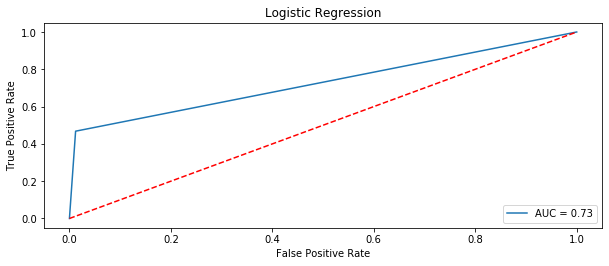

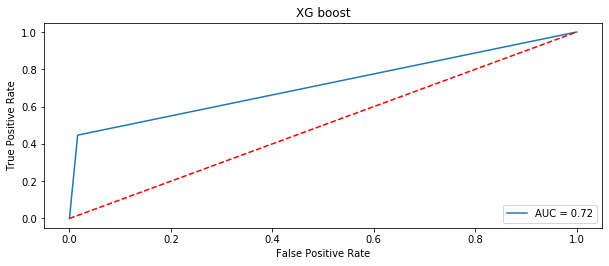

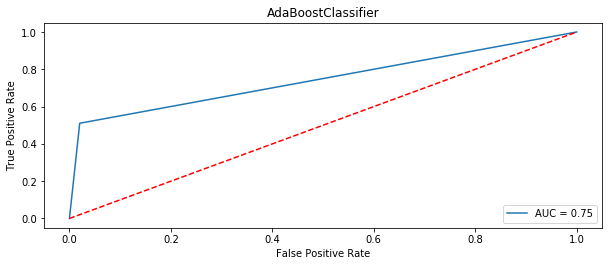

In [50]:
#Lists to store model name, Accuracy score, cross_val_score, Auc Roc score 
models =[]
models.append(("SVC",SVC()))
models.append(("Random Forest",RandomForestClassifier(n_estimators=100)))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("GradientBoostingClassifier",GradientBoostingClassifier()))    
models.append(("KNeighborClassifier",KNeighborsClassifier(n_neighbors=6)))
models.append(("GaussianNB",GaussianNB()))
models.append(("Logistic Regression",LogisticRegression()))
models.append(("XG boost",XGBClassifier()))
models.append(('AdaBoostClassifier',AdaBoostClassifier()))

Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print("********************",name,"*********************")
    print('\n')
    Model.append(name)
    acc_state=maxrandomcore(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=0.20,stratify=y)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy Score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='roc_auc').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label= 'AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n\n")



In [51]:
#lookover the accuracy_score,Cross_val_score,Roc_auc_curve in a DataFrame which we calculated above
result=pd.DataFrame({'Model':Model,'accuracy_score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,accuracy_score,Cross_val_score,Roc_auc_curve
0,SVC,88.775510,81.964050,64.893617
1,Random Forest,87.074830,79.629842,61.297269
2,DecisionTree,84.693878,61.307804,66.771470
3,GradientBoostingClassifier,89.455782,81.031761,68.744078
4,KNeighborClassifier,86.054422,69.487786,56.382979
5,GaussianNB,87.074830,76.630010,78.525282
6,Logistic Regression,90.476190,82.681134,72.796968
7,XG boost,89.795918,81.243704,71.530709
8,AdaBoostClassifier,90.476190,81.056632,74.519769


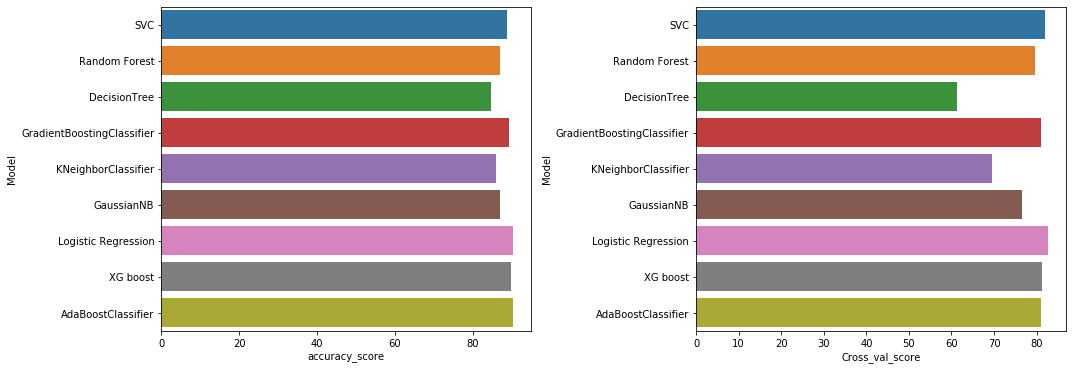

In [52]:
#Plotting bar plot of acc scores and cv scores of various models
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.barplot(x = 'accuracy_score', y = 'Model', data = result)

plt.subplot(3,2,2)
sns.barplot(x = 'Cross_val_score', y = 'Model', data = result)
plt.tight_layout()
plt.show()


In [53]:
#function to calculate accuracy,precision,recall and f1 score
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [54]:
#for getting best set of parameters for LogisticRegression we will use grid searchCV
from sklearn.model_selection import GridSearchCV
gridR = {"C": np.logspace(-4, 4, 20),"solver": ["liblinear"]}


clfR = LogisticRegression()

# Setup GridSearchCV
gs_clfR = GridSearchCV(estimator=clfR,
                      param_grid=gridR,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the GridSearchCV
gs_clfR.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.00026366508987303583, solver=liblinear ......................
[CV] ....... C=0.00026366508987303583, solver=liblinear, total=   0.0s
[CV] C=0.00026366508987303583, solver=liblinear ......................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.23357214690901212, solver=liblinear, total=   0.0s
[CV] C=0.23357214690901212, solver=liblinear .........................
[CV] .......... C=0.23357214690901212, solver=liblinear, total=   0.0s
[CV] C=0.615848211066026, solver=liblinear ...........................
[CV] ............ C=0.615848211066026, solver=liblinear, total=   0.0s
[CV] C=0.615848211066026, solver=liblinear ...........................
[CV] ............ C=0.615848211066026, solver=liblinear, total=   0.0s
[CV] C=0.615848211066026, solver=liblinear ...........................
[CV] ............ C=0.615848211066026, solver=liblinear, total=   0.0s
[CV] C=0.615848211066026, solver=liblinear ...........................
[CV] ............ C=0.615848211066026, solver=liblinear, total=   0.0s
[CV] C=0.615848211066026, solver=liblinear ...........................
[CV] ............ C=0.615848211066026, solver=liblinear, total=   0.0s
[CV] C=1.623776739188721, solver=liblinear ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [55]:
# best parameters for LogisticRegression
print("Best parameter:",gs_clfR.best_params_)
print("score:",gs_clfR.best_score_)

Best parameter: {'C': 4.281332398719396, 'solver': 'liblinear'}
score: 0.8767006802721088


In [56]:
#checking accuracy score using best parameters which calculated from gridsearchCV
clfR = LogisticRegression(C= 4.281332398719396, solver='liblinear')
maxrandomcore(clfR,x,y)

max acc score corresponding to 78 is: 0.9047619047619048


78

In [57]:
#for getting best set of parameters for DecisionTreeClassifier we will use grid searchCV
gridD = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4],'criterion':['gini','entropy']}

clfD = DecisionTreeClassifier()

# Setup GridSearchCV
gs_clfD = GridSearchCV(estimator=clfD,
                      param_grid=gridD,
                      cv=5, # 3-fold cross-validation
                      verbose=2) # print out progress

# Fit the GridSearchCV
gs_clfD.fit(x_train, y_train);

Fitting 5 folds for each of 588 candidates, totalling 2940 fits
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=2 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=2 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=2 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=2 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=2 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=3 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=3 .

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] criterion=gini, max_leaf_nodes=4, min_samples_split=4 ...........
[CV]  criterion=gini, max_leaf_nodes=4, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=4, min_samples_split=4 ...........
[CV]  criterion=gini, max_leaf_nodes=4, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=4, min_samples_split=4 ...........
[CV]  criterion=gini, max_leaf_nodes=4, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=5, min_samples_split=2 ...........
[CV]  criterion=gini, max_leaf_nodes=5, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=5, min_samples_split=2 ...........
[CV]  criterion=gini, max_leaf_nodes=5, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=5, min_samples_split=2 ...........
[CV]  criterion=gini, max_leaf_nodes=5, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=5, min_samples_split=2 ...........
[CV]  criterion=gini, max_leaf_nodes=5, min_samples_

[CV]  criterion=gini, max_leaf_nodes=10, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=10, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=10, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=10, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=10, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=10, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=10, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=10, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=10, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=10, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=10, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=10, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=10, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=10, mi

[CV]  criterion=gini, max_leaf_nodes=15, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=15, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=15, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=15, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=15, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=15, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=15, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=15, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=15, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=15, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=15, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=15, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=15, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=15, mi

[CV]  criterion=gini, max_leaf_nodes=19, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=19, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=19, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=19, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=19, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=19, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=19, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=19, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=19, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=19, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=19, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=19, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=19, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=20, mi

[CV]  criterion=gini, max_leaf_nodes=23, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=23, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=23, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=23, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=23, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=24, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=24, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=24, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=24, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=24, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=24, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=24, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=24, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=24, mi

[CV]  criterion=gini, max_leaf_nodes=28, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=28, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=28, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=28, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=28, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=28, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=28, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=28, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=28, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=28, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=28, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=28, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=28, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=28, mi

[CV]  criterion=gini, max_leaf_nodes=32, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=32, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=32, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=32, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=32, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=32, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=32, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=32, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=32, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=32, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=32, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=32, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=32, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=32, mi

[CV]  criterion=gini, max_leaf_nodes=36, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=36, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=36, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=36, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=36, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=36, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=36, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=36, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=36, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=36, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=36, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=36, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=36, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=36, mi

[CV]  criterion=gini, max_leaf_nodes=40, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=40, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=40, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=40, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=40, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=40, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=40, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=40, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=40, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=40, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=40, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=40, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=40, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=40, mi

[CV]  criterion=gini, max_leaf_nodes=44, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=44, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=44, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=44, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=44, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=44, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=44, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=44, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=44, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=44, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=44, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=44, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=44, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=44, mi

[CV]  criterion=gini, max_leaf_nodes=48, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=48, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=48, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=48, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=48, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=48, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=48, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=48, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=48, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=48, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=48, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=48, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=48, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=48, mi

[CV]  criterion=gini, max_leaf_nodes=51, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=51, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=51, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=52, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=52, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=52, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=52, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=52, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=52, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=52, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=52, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=52, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=52, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=52, mi

[CV]  criterion=gini, max_leaf_nodes=57, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=57, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=57, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=57, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=57, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=57, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=57, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=57, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=57, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=57, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=57, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=57, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=57, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=57, mi

[CV]  criterion=gini, max_leaf_nodes=62, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=62, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=62, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=62, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=62, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=62, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=62, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=62, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=62, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=62, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=62, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=62, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=62, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=62, mi

[CV]  criterion=gini, max_leaf_nodes=67, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=67, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=67, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=67, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=67, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=67, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=67, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=68, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=68, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=68, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=68, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=68, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=68, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=68, mi

[CV]  criterion=gini, max_leaf_nodes=72, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=73, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=73, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=73, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=73, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=73, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=73, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=73, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=73, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=73, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=73, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=73, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=73, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=73, mi

[CV]  criterion=gini, max_leaf_nodes=77, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=78, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=78, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=78, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=78, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=78, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=78, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=78, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=78, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=78, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=78, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=78, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=78, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=78, mi

[CV]  criterion=gini, max_leaf_nodes=82, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=82, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=82, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=82, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=82, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=83, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=83, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=83, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=83, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=83, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=83, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=83, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=83, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=83, mi

[CV]  criterion=gini, max_leaf_nodes=87, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=87, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=87, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=87, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=87, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=87, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=87, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=87, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=87, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=87, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=87, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=88, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=88, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=88, mi

[CV]  criterion=gini, max_leaf_nodes=92, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=92, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=92, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=92, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=92, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=92, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=92, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=92, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=92, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=92, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=92, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=92, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=92, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=92, mi

[CV]  criterion=gini, max_leaf_nodes=96, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=96, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=96, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=96, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=96, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=96, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=96, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=96, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=96, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=96, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=96, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=96, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=96, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=97, mi

[CV]  criterion=entropy, max_leaf_nodes=3, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=3, min_samples_split=4 ........
[CV]  criterion=entropy, max_leaf_nodes=3, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=3, min_samples_split=4 ........
[CV]  criterion=entropy, max_leaf_nodes=3, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=3, min_samples_split=4 ........
[CV]  criterion=entropy, max_leaf_nodes=3, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=4, min_samples_split=2 ........
[CV]  criterion=entropy, max_leaf_nodes=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=4, min_samples_split=2 ........
[CV]  criterion=entropy, max_leaf_nodes=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=4, min_samples_split=2 ........
[CV]  criterion=entropy, max_leaf_nodes=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_

[CV]  criterion=entropy, max_leaf_nodes=8, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=8, min_samples_split=2 ........
[CV]  criterion=entropy, max_leaf_nodes=8, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=8, min_samples_split=2 ........
[CV]  criterion=entropy, max_leaf_nodes=8, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=8, min_samples_split=3 ........
[CV]  criterion=entropy, max_leaf_nodes=8, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=8, min_samples_split=3 ........
[CV]  criterion=entropy, max_leaf_nodes=8, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=8, min_samples_split=3 ........
[CV]  criterion=entropy, max_leaf_nodes=8, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=8, min_samples_split=3 ........
[CV]  criterion=entropy, max_leaf_nodes=8, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_

[CV]  criterion=entropy, max_leaf_nodes=12, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=12, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=12, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=12, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=12, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=12, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=12, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=12, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=12, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=12, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=12, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=12, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=12, min_samples_split=3, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=17, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=17, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=17, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=17, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=17, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=17, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=17, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=17, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=17, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=17, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=17, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=17, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=17, min_samples_split=4, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=22, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=22, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=22, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=22, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=22, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=22, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=22, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=22, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=22, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=22, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=22, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=22, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=22, min_samples_split=3, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=26, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=26, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=26, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=26, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=26, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=26, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=26, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=26, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=26, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=27, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=27, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=27, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=27, min_samples_split=2, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=31, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=31, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=31, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=31, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=31, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=31, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=31, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=31, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=31, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=31, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=31, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=31, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=31, min_samples_split=4, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=35, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=35, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=35, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=35, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=35, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=35, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=35, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=35, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=35, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=36, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=36, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=36, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=36, min_samples_split=2, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=40, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=40, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=40, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=40, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=40, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=40, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=40, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=40, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=40, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=40, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=40, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=40, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=40, min_samples_split=3, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=44, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=44, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=44, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=44, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=44, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=44, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=44, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=44, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=44, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=44, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=44, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=44, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=44, min_samples_split=3, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=48, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=48, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=48, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=48, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=48, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=48, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=48, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=48, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=48, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=48, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=48, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=48, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=48, min_samples_split=3, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=52, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=52, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=52, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=52, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=52, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=52, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=52, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=52, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=52, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=52, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=52, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=52, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=52, min_samples_split=4, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=56, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=56, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=56, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=56, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=56, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=56, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=56, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=56, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=56, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=56, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=56, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=56, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=56, min_samples_split=3, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=60, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=60, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=60, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=60, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=60, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=60, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=60, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=60, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=60, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=60, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=60, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=60, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=60, min_samples_split=4, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=64, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=64, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=64, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=64, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=64, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=64, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=64, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=64, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=64, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=64, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=64, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=64, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=64, min_samples_split=4, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=68, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=68, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=68, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=68, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=68, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=68, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=68, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=68, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=68, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=69, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=69, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=69, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=69, min_samples_split=2, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=72, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=72, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=72, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=72, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=72, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=72, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=72, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=72, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=72, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=73, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=73, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=73, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=73, min_samples_split=2, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=76, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=76, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=76, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=76, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=76, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=76, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=76, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=76, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=76, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=77, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=77, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=77, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=77, min_samples_split=2, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=80, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=80, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=80, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=81, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=81, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=81, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=81, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=81, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=81, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=81, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=81, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=81, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=81, min_samples_split=2, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=84, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=84, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=84, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=84, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=84, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=85, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=85, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=85, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=85, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=85, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=85, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=85, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=85, min_samples_split=2, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=88, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=88, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=88, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=89, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=89, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=89, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=89, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=89, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=89, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=89, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=89, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=89, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=89, min_samples_split=2, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=92, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=93, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=93, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=93, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=93, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=93, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=93, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=93, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=93, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=93, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=93, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=93, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=93, min_samples_split=3, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=96, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=97, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=97, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=97, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=97, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=97, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=97, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=97, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=97, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=97, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=97, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=97, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=97, min_samples_split=3, total=   0.0s
[CV] criterion=entrop

[Parallel(n_jobs=1)]: Done 2940 out of 2940 | elapsed:   22.6s finished


In [58]:
# best parameters for DecisionTreeClassifier
print("Best parameter:",gs_clfD.best_params_)
print("score:",gs_clfD.best_score_)

Best parameter: {'criterion': 'gini', 'max_leaf_nodes': 3, 'min_samples_split': 2}
score: 0.8460884353741497


In [73]:
#checking accuracy score using best parameters which calculated from gridsearchCV
dtc=DecisionTreeClassifier(criterion = 'gini',max_leaf_nodes=3, min_samples_split= 2)
maxrandomcore(dtc,x,y)

max acc score corresponding to 80 is: 0.8741496598639455


80

In [60]:
#use gridsearchcv to find out best parameters for KNeighborsClassifier
grid_1={'n_neighbors':[3,5,11,19],
            'weights':['uniform','distance'],
            'metric':['euclidean','manhattan']
            }
# Setup GridSearchCV
gs_clf1 = GridSearchCV(KNeighborsClassifier(),
                      param_grid=grid_1,
                      cv=5, # 5-fold cross-validation
                      verbose=2,
                      n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf1.fit(x_train, y_train);


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  57 out of  80 | elapsed:    2.9s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.0s finished


In [61]:
# best parameters for KNeighborsClassifier
print("Best parameter:",gs_clf1.best_params_)
print("score:",gs_clf1.best_score_)

Best parameter: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
score: 0.8562925170068028


In [69]:
#checking accuracy score using best parameters which calculated from gridsearchCV
knn=KNeighborsClassifier(metric='manhattan', n_neighbors= 11, weights= 'uniform')
maxrandomcore(knn,x,y)

max acc score corresponding to 47 is: 0.8673469387755102


47

In [63]:
#lets use gridsearchcv to find out best parameters for RandomForestClassifier
grid = {'n_estimators': [500, 1000, 1500],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, total=   1.3s
[CV] max_depth=None, max_feature

[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   1.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   1.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   2.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   1.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   2.1s
[CV] max_depth=None, max_

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   1.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   1.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   1.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   1.3s
[CV] max_depth=None, max_f

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   1.9s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   1.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   1.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   1.4s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   1.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   1.8s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.7s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.8s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.7s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   1.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   1.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   1.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   2.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   2.2s
[CV] max_depth=10, max_features=auto, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   1.4s
[CV] max_depth=10, max_features=sqrt, min_samples_

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   1.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   1.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   2.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   2.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   1.9s


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  7.6min finished


In [64]:
# best parameters for RandomForestClassifier
print("Best parameter:",gs_clf.best_params_)
print("score:",gs_clf.best_score_)

Best parameter: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 500}
score: 0.8571428571428571


In [66]:
#checking accuracy score using best parameters which calculated from gridsearchCV
rf=RandomForestClassifier(n_estimators=500,max_depth=None, min_samples_leaf= 2, max_features= 'sqrt',min_samples_split=4)
maxrandomcore(rf,x,y)

max acc score corresponding to 96 is: 0.8775510204081632


96

In [67]:
#lets use gridsearchcv to find out best parameters for GradientBoostingClassifier
grid_3 = {
    "learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]
    }
clf = GradientBoostingClassifier()

# Setup GridSearchCV
gs_clf3 = GridSearchCV(estimator=clf,
                      param_grid=grid_3,
                      cv=5, # 5-fold cross-validation
                      verbose=2,refit=True,n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf3.fit(x_train, y_train);

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   11.3s finished


In [68]:
# best parameters for GradientBoostingClassifier
print("Best parameter:",gs_clf3.best_params_)
print("score:",gs_clf3.best_score_)

Best parameter: {'learning_rate': 0.01, 'n_estimators': 1000}
score: 0.8571428571428571


In [70]:
#checking accuracy score using best parameters which calculated from gridsearchCV
gb=GradientBoostingClassifier(criterion = 'friedman_mse', learning_rate= 0.01,n_estimators=1000)
maxrandomcore(gb,x,y)

max acc score corresponding to 47 is: 0.8979591836734694


47

In [71]:
#lets use gridsearchcv to find out best parameters for SVC
grid_4 = { 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]
         }
clf = SVC()

# Setup GridSearchCV
gs_clf4 = GridSearchCV(estimator=clf,
                      param_grid=grid_4,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

gs_clf4.fit(x_train, y_train);

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................................ C=1, gamma=0.0001, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................ C=1, gamma=0.0001, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................................ C=1, gamma=0.0001, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................................ C=1, gamma=0.0001, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................................ C=1, gamma=0.0001, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................................ C=10, gamma=0.001, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................................ C=10, gamma=0.001, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................................ C=10, gamma=0.001, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.4s finished


In [72]:
#best parameters for svc
print("Best parameter:",gs_clf4.best_params_)
print("score:",gs_clf4.best_score_)

Best parameter: {'C': 100, 'gamma': 0.001}
score: 0.8758503401360545


In [74]:
svc=SVC(C=100,gamma=0.001)
maxrandomcore(svc,x,y)

max acc score corresponding to 97 is: 0.9013605442176871


97

In [75]:
#lets use gridsearchcv to find out best parameters for XGBClassifier
grid_3 = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]
         }
clf = XGBClassifier()

# Setup GridSearchCV
gs_clf3 = GridSearchCV(estimator=clf,
                      param_grid=grid_3,
                      cv=5, # 5-fold cross-validation
                      verbose=2,refit=True) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf3.fit(x_train, y_train);

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [76]:
# best parameters for XGBClassifier
print("Best parameter:",gs_clf3.best_params_)
print("score:",gs_clf3.best_score_)

Best parameter: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 5, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}
score: 0.8477891156462585


In [77]:
#checking accuracy score using best parameters which calculated from gridsearchCV
xg=XGBClassifier(colsample_bytree=0.7,learning_rate=0.05,max_depth= 6,min_child_weight= 11,missing=-999,n_estimators= 5,nthread= 4,objective= 'binary:logistic',
 seed= 1337,
 silent= 1,
 subsample= 0.8)
maxrandomcore(xg,x,y)

max acc score corresponding to 47 is: 0.8639455782312925


47

In [81]:
#lets use gridsearchcv to find out best parameters for AdaBoostClassifier
grid_ad =  {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1]
}
clf = AdaBoostClassifier()

# Setup GridSearchCV
gs_clfad = GridSearchCV(estimator=clf,
                      param_grid=grid_ad,
                      cv=5, # 5-fold cross-validation
                      verbose=2,refit=True) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clfad.fit(x_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] learning_rate=0.01, n_estimators=50 .............................
[CV] .............. learning_rate=0.01, n_estimators=50, total=   0.1s
[CV] learning_rate=0.01, n_estimators=50 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............. learning_rate=0.01, n_estimators=50, total=   0.1s
[CV] learning_rate=0.01, n_estimators=50 .............................
[CV] .............. learning_rate=0.01, n_estimators=50, total=   0.1s
[CV] learning_rate=0.01, n_estimators=50 .............................
[CV] .............. learning_rate=0.01, n_estimators=50, total=   0.1s
[CV] learning_rate=0.01, n_estimators=50 .............................
[CV] .............. learning_rate=0.01, n_estimators=50, total=   0.1s
[CV] learning_rate=0.01, n_estimators=100 ............................
[CV] ............. learning_rate=0.01, n_estimators=100, total=   0.2s
[CV] learning_rate=0.01, n_estimators=100 ............................
[CV] ............. learning_rate=0.01, n_estimators=100, total=   0.2s
[CV] learning_rate=0.01, n_estimators=100 ............................
[CV] ............. learning_rate=0.01, n_estimators=100, total=   0.2s
[CV] learning_rate=0.01, n_estimators=100 ............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    7.9s finished


In [82]:
# best parameters for AdaBoostClassifier
print("Best parameter:",gs_clfad.best_params_)
print("score:",gs_clfad.best_score_)

Best parameter: {'learning_rate': 0.3, 'n_estimators': 50}
score: 0.8647959183673469


In [84]:
#checking accuracy score using best parameters which calculated from gridsearchCV 
ad=AdaBoostClassifier(learning_rate=0.3,n_estimators=50)
maxrandomcore(ad,x,y)

max acc score corresponding to 48 is: 0.8877551020408163


48

In [85]:
#using AdaBoostClassifier base_estimator as SVC
svc=SVC(C=100,gamma=0.001,kernel='rbf')
ada_rm=AdaBoostClassifier(base_estimator=svc,learning_rate=0.3,n_estimators=50,algorithm='SAMME')
ada_rm.fit(x_train, y_train)
y_predrad = ada_rm.predict(x_test)
evaluate_preds(y_test,y_predrad)


Acc: 84.01%
Precision: 0.00
Recall: 0.00
F1 score: 0.00


{'accuracy': 0.84, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0}

# After all this process conclusion is that LogisticRegression,adabooster   performing well.lets identify more which to use on the basis of roc_auc_score

In [122]:
# x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=78,test_size=0.20,stratify=y)
lg=LogisticRegression(C= 0.281332398719396, solver='liblinear')
lg.fit(x_train,y_train)
lgpred=lg.predict(x_test)
evaluate_preds(y_test,lgpred)

Acc: 90.48%
Precision: 0.88
Recall: 0.47
F1 score: 0.61


{'accuracy': 0.9, 'precision': 0.88, 'recall': 0.47, 'f1': 0.61}

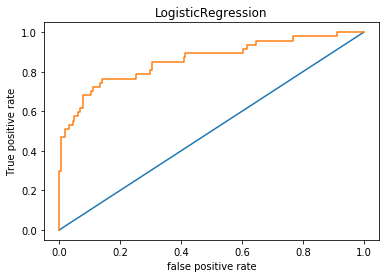

roc_auc_score =  0.860108536480317


In [112]:
# Make predictions with probabilities
y_probs = lg.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('LogisticRegression')
plt.show()
print('roc_auc_score = ',roc_auc_score(y_test, y_probs))

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=81,test_size=0.2,stratify=y)
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
adpred=ad.predict(x_test)
evaluate_preds(y_test,adpred)

Acc: 90.48%
Precision: 0.83
Recall: 0.51
F1 score: 0.63


{'accuracy': 0.9, 'precision': 0.83, 'recall': 0.51, 'f1': 0.63}

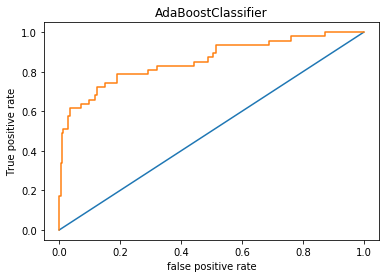

roc_auc_score =  0.8568352140580584


In [106]:
# Make predictions with probabilities
y_probs = ad.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='AdaBoostClassifier')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('AdaBoostClassifier')
plt.show()
print('roc_auc_score = ',roc_auc_score(y_test, y_probs))

# After all this process conclusion is that LogisticRegression  performing well than adabooster.
because roc_auc_score higher in LogisticRegression'

(2.0, 0.0)

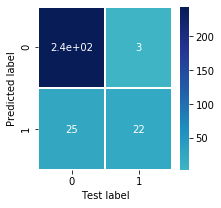

In [113]:
# Confusion matrix Visualization
fig, ax =plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, lgpred),annot=True,linewidths=1,center=0,cmap='YlGnBu')
plt.xlabel("Test label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [114]:
# Printing predicted values
test=pd.DataFrame(data=y_test,)
test['Predicted values']=lgpred
test
# On the lest side values are those fields which are taken by machine for test...

,Attrition,Predicted values
1252,0,0
659,0,0
589,1,1
260,0,0
1373,0,0
...,...,...
1369,1,0
212,0,0
371,0,0
1003,0,0


In [ ]:
# Saving the Predicted values in csv file
df1=pd.DataFrame(knnpred)
df1.to_csv('hr_analytics_submission.csv')

# Feature importance
Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable (Attrition) 

In [115]:
# Fit an instance of LogisticRegression (taken from above)
lg.fit(x_train, y_train);

In [116]:
# Check coef_
lg.coef_

array([[-0.16274316, -0.18252546, -0.08746674,  0.33568317,  0.24127706,
         0.02726856,  0.06476415, -0.10217641, -0.39431463,  0.11302479,
        -0.03518388, -0.31866082, -0.17810135, -0.1414043 , -0.36020048,
         0.28629338, -0.33794506,  0.08215262,  0.39656897,  0.7170419 ,
        -0.18802667,  0.078638  , -0.26921103, -0.24245838, -0.28097538,
        -0.1611227 , -0.13596896,  0.26267889, -0.28246644,  0.42111442,
        -0.43875855]])

In [117]:
# Match features to columns
features_dict = dict(zip(df.columns, list(lg.coef_[0])))
features_dict

{'Age': -0.16274315589371932,
 'Attrition': -0.18252545818259375,
 'BusinessTravel': -0.08746673763387104,
 'DailyRate': 0.33568316616429317,
 'Department': 0.2412770585719946,
 'DistanceFromHome': 0.02726856153117569,
 'Education': 0.06476415041836751,
 'EducationField': -0.10217641191393721,
 'EmployeeNumber': -0.39431463362616276,
 'EnvironmentSatisfaction': 0.11302479254284654,
 'Gender': -0.035183882323959935,
 'HourlyRate': -0.31866082044598776,
 'JobInvolvement': -0.17810135209317818,
 'JobLevel': -0.14140430216659036,
 'JobRole': -0.3602004809948825,
 'JobSatisfaction': 0.2862933758432955,
 'MaritalStatus': -0.33794505626821814,
 'MonthlyIncome': 0.08215261572939131,
 'MonthlyRate': 0.3965689650793101,
 'NumCompaniesWorked': 0.717041899708478,
 'OverTime': -0.18802667361559913,
 'PercentSalaryHike': 0.07863799535897353,
 'PerformanceRating': -0.26921103021363746,
 'RelationshipSatisfaction': -0.2424583848251512,
 'StockOptionLevel': -0.280975380863641,
 'TotalWorkingYears': -0.

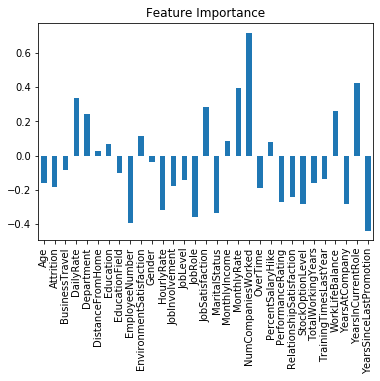

In [118]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

In [119]:
#lets save the model using joblib
from sklearn.externals import joblib
joblib.dump(lg,'hr_analytics_submission.pkl')

['hr_analytics_submission.pkl']

In [121]:
#lets read the model using joblib
lg_from_joblib=joblib.load('hr_analytics_submission.pkl')
joblib_y_preds = lg_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 90.48%
Precision: 0.88
Recall: 0.47
F1 score: 0.61


{'accuracy': 0.9, 'precision': 0.88, 'recall': 0.47, 'f1': 0.61}

# Conclusion:  